**Monte Carlo Test**

In [8]:
#libraries

import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#downloading some historical data

ticker = 'NVDA'
data = yf.download(ticker,start='2022-01-01',end='2025-01-01')

#adj close prices

adj_close=data['Close']

#daily returns

returns = adj_close.pct_change().dropna()

#MC stats

mean_return = returns.mean()
volatility = returns.std ()

[*********************100%***********************]  1 of 1 completed


**Geometric Brownian Motion**

In [14]:
#Parameters

num_simulations = 1000
time_horizon = 252
initial_price = adj_close.iloc[-1]

#Initilize array to store results

simulation_results = np.zeros((time_horizon,num_simulations))

#monte carlo

for i in range(num_simulations):
    simulated_prices = np.zeros(time_horizon)
    simulated_prices[0] =initial_price
    for t in range (1,time_horizon):
        #GBM Components
        drift = (mean_return -0.5 * volatility ** 2)
        shock = volatility* np.random.normal() 
        simulated_prices[t] = simulated_prices[t-1] * np.exp(drift + shock)
    simulation_results[:,i] = simulated_prices #store results in array

C:\Users\Jose Chua\AppData\Local\Temp\ipykernel_31468\3502368240.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  simulated_prices[0] =initial_price
C:\Users\Jose Chua\AppData\Local\Temp\ipykernel_31468\3502368240.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  simulated_prices[t] = simulated_prices[t-1] * np.exp(drift + shock)


<function matplotlib.pyplot.show(close=None, block=None)>

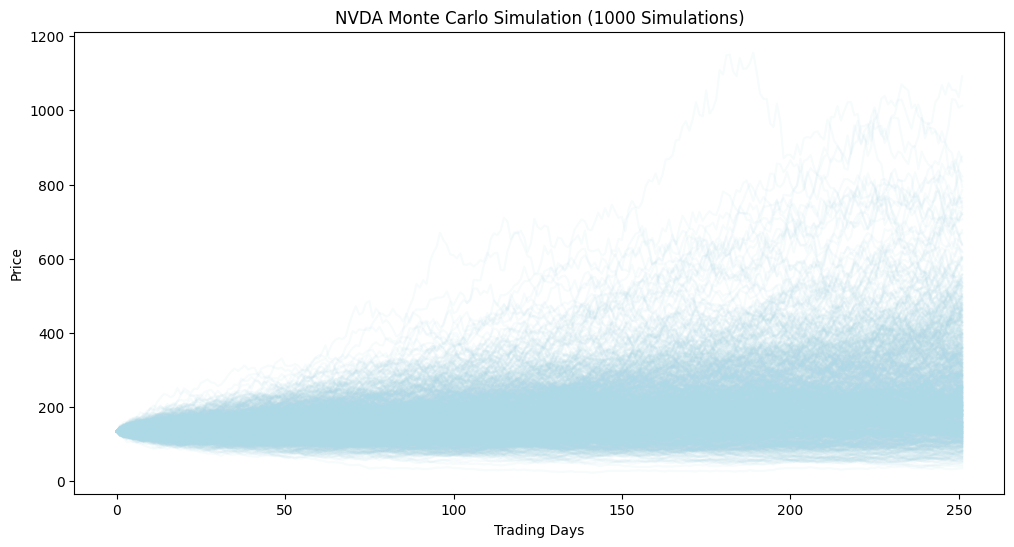

In [15]:
#plot

plt.figure(figsize=(12,6))
plt.plot(simulation_results, color = 'lightblue',alpha = 0.1)
plt.title(f'{ticker} Monte Carlo Simulation ({num_simulations} Simulations)')
plt.xlabel('Trading Days')
plt.ylabel('Price')
plt.grid
plt.show

In [26]:
#percentiles
final_prices = (simulation_results[-1,:])
p5 = np.percentile(final_prices,5)
p95 = np.percentile(final_prices,95)
mean_final_price = np.mean(final_prices)
median_final_price = np.median(final_prices)

print(f"Mean Final Price: {mean_final_price}")
print(f"Median Final Price: {median_final_price}")
print(f'5th Percentile: {p5}')
print(f'95th Percentile: {p95}')

Mean Final Price: 249.66140615941583
Median Final Price: 213.63468757213695
5th Percentile: 92.66783682078292
95th Percentile: 522.2858714174231


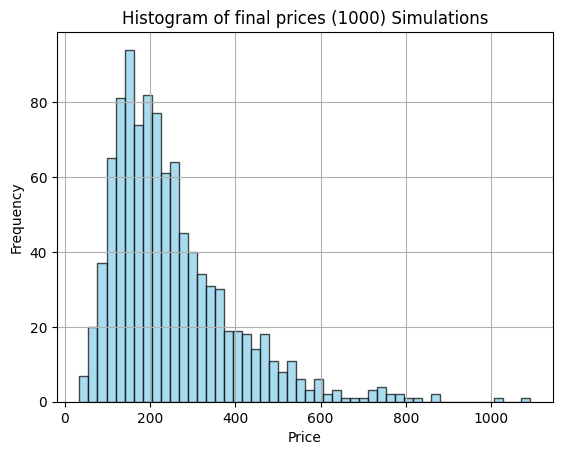

In [27]:
#histogram
plt.Figure(figsize=(10,6))
plt.hist(final_prices,bins=50,color='skyblue',edgecolor='black',alpha = 0.7)
plt.title(f'Histogram of final prices ({num_simulations}) Simulations')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [39]:
#making initial price a scaler value

initial_price = float(initial_price)

# making final price a np array

final_prices = np.array(simulation_results[-1, :]).flatten()

# Define price thresholds

thresholds = [initial_price * 0.8, initial_price, initial_price * 1.2]

# Calculate percentages of simulations meeting each threshold

percentages = [(final_prices >= threshold).mean() * 100 for threshold in thresholds]

# Display the results

for i, threshold in enumerate(thresholds):
    print(f"Percentage of simulations where final price >= {threshold:.2f}: {percentages[i]:.2f}%")


Percentage of simulations where final price >= 107.43: 91.00%
Percentage of simulations where final price >= 134.29: 81.40%
Percentage of simulations where final price >= 161.15: 69.90%


In [43]:
# Example: Calculate and display the percentage of prices above a certain value
target_price = initial_price * 1.5  # 150% of the initial price
percentage_above_target = (final_prices >= target_price).mean() * 100
print(f"Percentage of simulations where final price >= {target_price:.2f}: {percentage_above_target:.2f}%")

Percentage of simulations where final price >= 201.43: 54.70%


In [44]:
def calculate_percentage_above_target(final_prices, target_price):
    
    # Calculate the percentage of simulations above the target price
    percentage_above_target = (final_prices >= target_price).mean() * 100

    # Display the result
    print(f"Percentage of simulations where final price >= {target_price:.2f}: {percentage_above_target:.2f}%")

    return percentage_above_target

**Use the function to find the probability of NVDA exceeding the price you inputted**

In [48]:
calculate_percentage_above_target(final_prices, 1000);
calculate_percentage_above_target(final_prices, 250);
calculate_percentage_above_target(final_prices, 200);
calculate_percentage_above_target(final_prices, 150);

Percentage of simulations where final price >= 1000.00: 0.20%
Percentage of simulations where final price >= 250.00: 39.20%
Percentage of simulations where final price >= 200.00: 55.60%
Percentage of simulations where final price >= 150.00: 74.70%
